<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/handson_08_MLP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Pre installation__

## Get GPAW for DFT calculation

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install tqdm

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,457 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,700 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages 

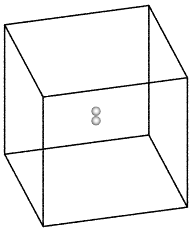

In [2]:
!apt-get update
!apt-get install -y python3-dev libopenblas-dev liblapack-dev libfftw3-dev libxc-dev
!pip install gpaw
!gpaw test
!wget https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.1.0.tar.gz
!tar -xzf gpaw-setups-24.1.0.tar.gz

import os
import gzip
import shutil

# Define the path to the setup files
setup_path = '/content/gpaw-setups-24.1.0'

# Uncompress all .gz files in the setup directory
for filename in os.listdir(setup_path):
    if filename.endswith('.gz'):
        filepath = os.path.join(setup_path, filename)
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# Set the GPAW_SETUP_PATH environment variable
os.environ['GPAW_SETUP_PATH'] = setup_path
# Verify the environment variable
print("GPAW_SETUP_PATH:", os.environ['GPAW_SETUP_PATH'])

# Import ASE and GPAW and run your calculation
from ase import Atoms
from gpaw import GPAW

# Define the atomic structure
d = 0.74
a = 10.0

h2 = Atoms('H2',
              positions=[(0, 0, 0),
                         (0, 0, d)],
              cell=(a, a, a))
h2.center()
# Initialize GPAW calculator without specifying the 'setups' parameter
calc = GPAW(mode='fd', nbands=2, txt='h2.txt')
h2.calc = calc

# Run the calculation
print("Forces on atoms:", h2.get_forces())
print("Energies on atoms:", h2.get_total_energy())

!sudo apt-get install povray  ## visulization program

import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks


def visual(structure, max_size=(200, 200), stretch_y=2.0, rotation='15z,-60x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)
    display(img)

    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    os.makedirs(destination, exist_ok=True)

    for file in files:
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))
visual(h2)

## Get Mace for MLP calculation

- Github from https://github.com/ACEsuit/mace

In [3]:
!pip install --upgrade pip
!pip install mace-torch
!pip install pymatgen
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 47.8 MB/s eta 0:00:00
  Created wheel for python-hostlist: filename=python_hostlist-2.0.0-py3-none-any.whl size=39465 sha256=d46f17c84537aad0a001080c1797885d5295b77e78255f28ae03d4951ee2abaa
  Stored in directory: /root/.cache/pip/wheels/71/e9/0b/1e7a2ca15b702dd36c81c33dad4c23773270dc417eca48dc72
Successfully built python-hostlist
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 34.0 MB/s eta 0:00:00


# __Excecution time comparison : DFT vs MLP__

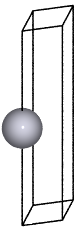

[1 atoms] GPAW execution time: 9.6171 sec


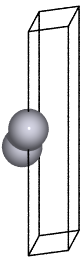

[2 atoms] GPAW execution time: 8.5260 sec


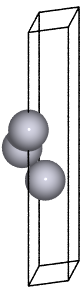

[3 atoms] GPAW execution time: 15.3354 sec


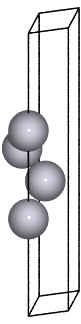

[4 atoms] GPAW execution time: 20.1016 sec


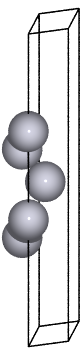

[5 atoms] GPAW execution time: 30.1425 sec


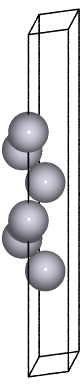

[6 atoms] GPAW execution time: 48.6102 sec


In [4]:
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW
from ase.build import bulk
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ase.build import fcc111
from ase.constraints import FixAtoms
import time

name = 'Pt-fcc'
a0 = 3.93  # fcc lattice parameter
k = 1
element='Pt'
# Set up the GPAW calculator
gpaw_calc = GPAW(mode=PW(400),
            kpts=(k, k, 1),
            xc='PBE',
            txt='slab.txt')

gpaw_elapsed_time_list = []
N_layer_list = [1,2,3,4,5,6]
for N_layer in N_layer_list:
    vac = 7.5
    gpaw_surf = fcc111(element, (1, 1, N_layer), a=a0, vacuum=vac)
    gpaw_surf.calc = gpaw_calc

    mace_surf = fcc111(element, (1, 1, N_layer), a=a0, vacuum=vac)

    median_z = np.median(mace_surf.positions[:, 2])
    constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in mace_surf])
    gpaw_surf.set_constraint(constraint)

    # GPAW computation time
    start_time = time.time()
    _ = gpaw_surf.get_potential_energy()
    end_time = time.time()
    visual(gpaw_surf)
    gpaw_elapsed_time = end_time - start_time
    gpaw_elapsed_time_list.append(gpaw_elapsed_time)

    print(f'[{len(gpaw_surf)} atoms] GPAW execution time: {gpaw_elapsed_time:.4f} sec')

/usr/local/lib/python3.10/dist-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.d

Cached MACE model to /root/.cache/mace/5yyxdm76
Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.


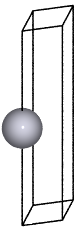

[1 atoms] MACE execution time: 3216.7370 ms


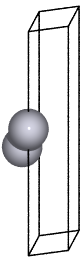

[2 atoms] MACE execution time: 497.6273 ms


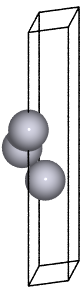

[3 atoms] MACE execution time: 1841.3250 ms


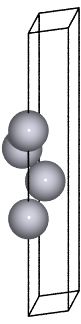

[4 atoms] MACE execution time: 1797.8122 ms


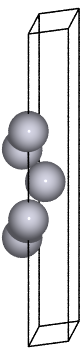

[5 atoms] MACE execution time: 3074.5966 ms


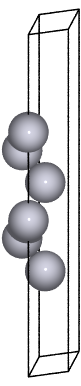

[6 atoms] MACE execution time: 51.8184 ms


In [5]:

from mace.calculators import mace_mp


# Set up the MACE calculator
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device='cuda')

mace_elapsed_time_list = []
N_layer_list = [1,2,3,4,5,6]
for N_layer in N_layer_list:
    vac = 7.5
    mace_surf = fcc111(element, (1, 1, N_layer), a=a0, vacuum=vac)
    mace_surf.calc = mace_calc

    # MACE computation time
    start_time = time.time()
    _ = mace_surf.get_potential_energy()
    end_time = time.time()
    visual(mace_surf)

    mace_elapsed_time = end_time - start_time
    mace_elapsed_time_list.append(mace_elapsed_time)

    print(f'[{len(mace_surf)} atoms] MACE execution time: {mace_elapsed_time * 1000 :.4f} ms')

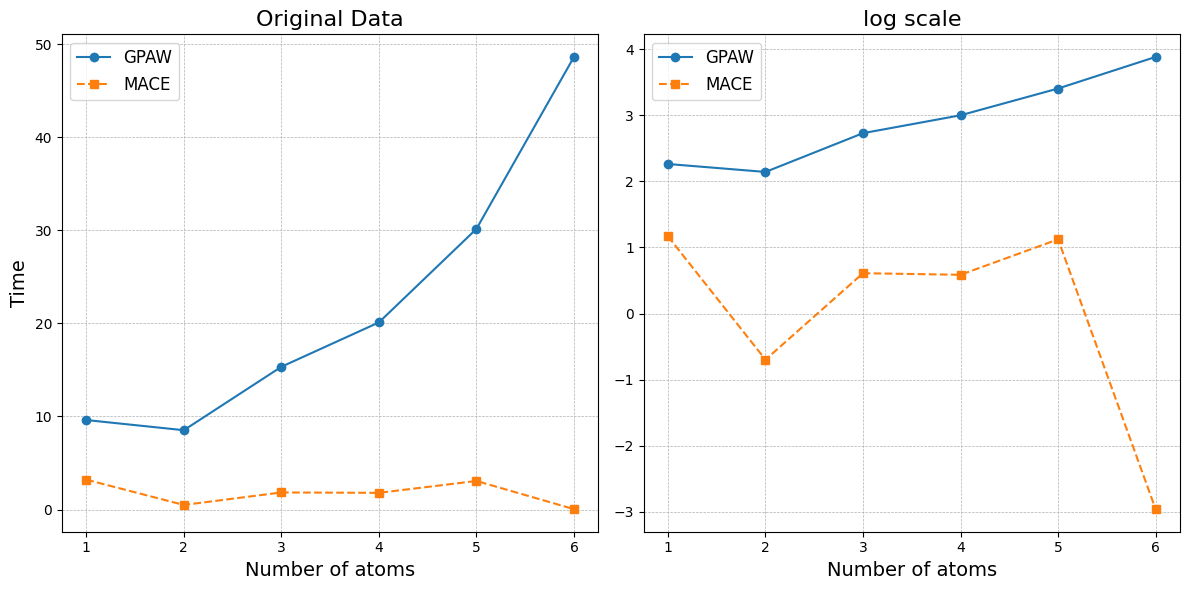

In [6]:
# For visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = N_layer_list
y1 = gpaw_elapsed_time_list
y2 = mace_elapsed_time_list
y1_legend = 'GPAW'
y2_legend = 'MACE'

log_y1 = np.log(y1)
log_y2 = np.log(y2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(x, y1, label=y1_legend, marker='o', linestyle='-', markersize=6)
axes[0].plot(x, y2, label=y2_legend, marker='s', linestyle='--', markersize=6)
axes[0].set_title('Original Data', fontsize=16)
axes[0].set_xlabel('Number of atoms', fontsize=14)
axes[0].set_ylabel('Time', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(fontsize=12)

axes[1].plot(x, log_y1, label=y1_legend, marker='o', linestyle='-', markersize=6)
axes[1].plot(x, log_y2, label=y2_legend, marker='s', linestyle='--', markersize=6)
axes[1].set_title('log scale', fontsize=16)
axes[1].set_xlabel('Number of atoms', fontsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


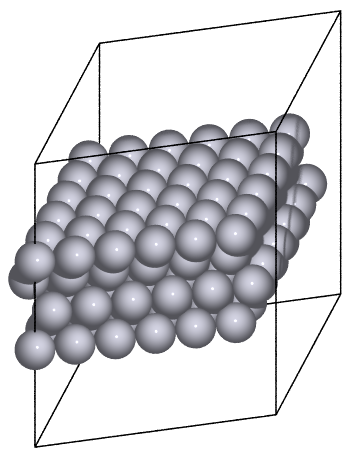

[144 atoms] MACE execution time: 183.5938 ms


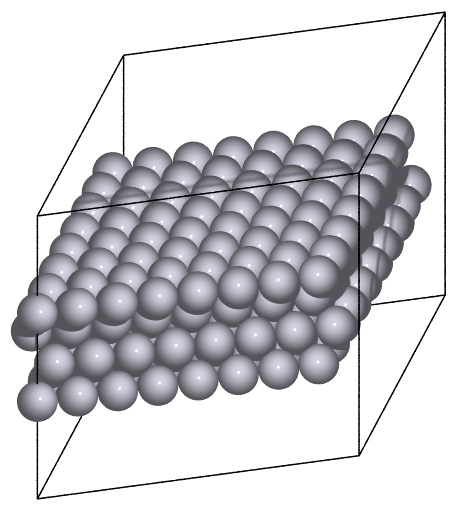

[256 atoms] MACE execution time: 246.9442 ms


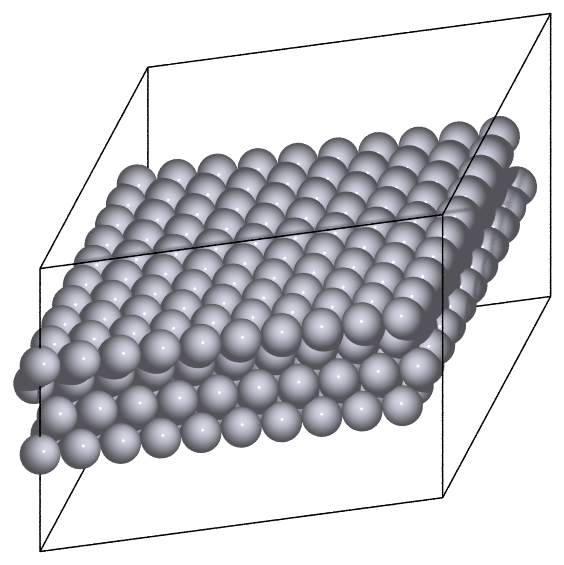

[400 atoms] MACE execution time: 257.5305 ms


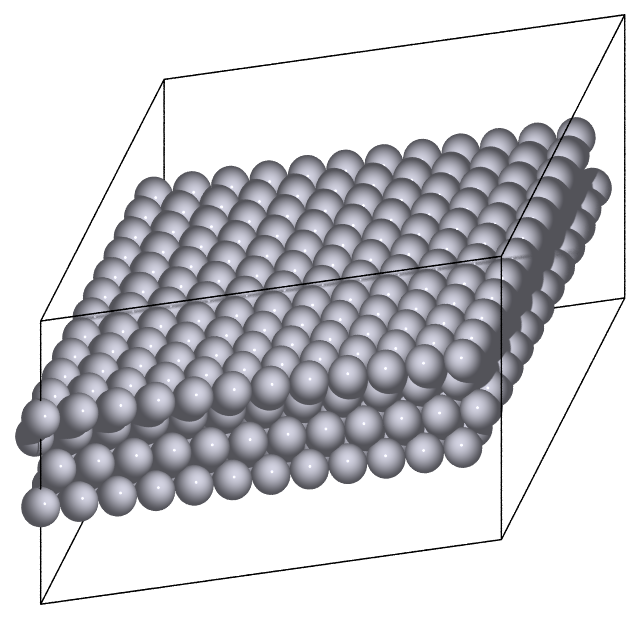

[576 atoms] MACE execution time: 340.4374 ms


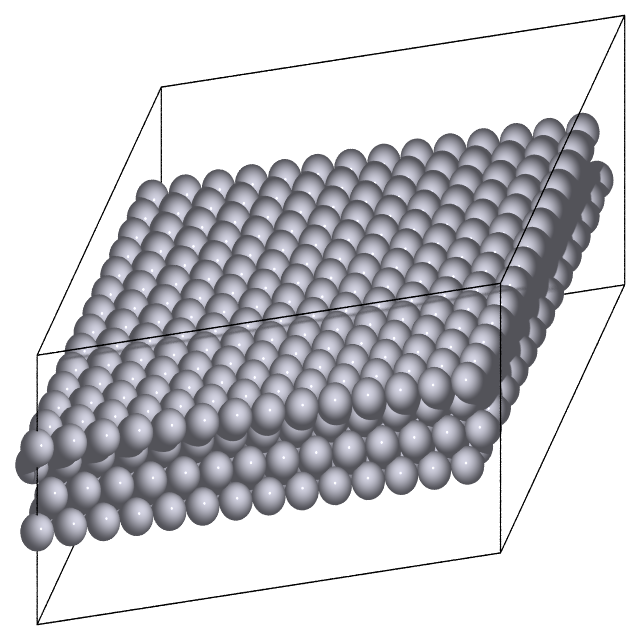

[784 atoms] MACE execution time: 410.1350 ms


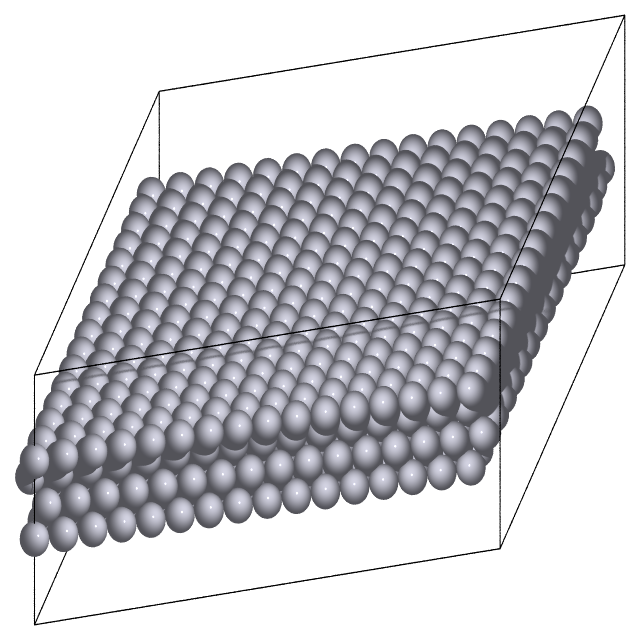

[1024 atoms] MACE execution time: 489.7275 ms


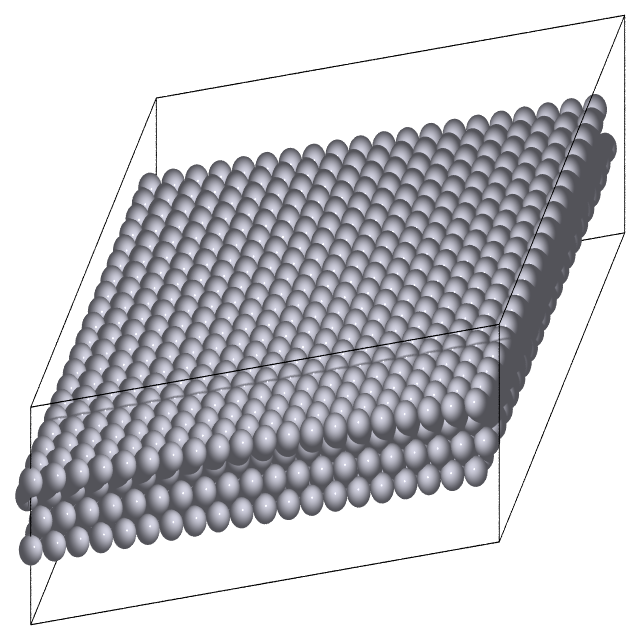

[1600 atoms] MACE execution time: 696.2888 ms


In [7]:
# Set up the MACE calculator
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device='cuda')
mace_elapsed_time_list_by_size = []
size_up = [6,8,10,12,14,16,20]
for size in size_up:
    vac = 7.5
    mace_surf = fcc111(element, (size, size, 4), a=a0, vacuum=vac)
    mace_surf.calc = mace_calc

    # MACE computation time
    start_time = time.time()
    _ = mace_surf.get_potential_energy()
    end_time = time.time()
    visual(mace_surf)

    mace_elapsed_time = end_time - start_time
    mace_elapsed_time_list_by_size.append(mace_elapsed_time)

    print(f'[{len(mace_surf)} atoms] MACE execution time: {mace_elapsed_time * 1000 :.4f} ms')

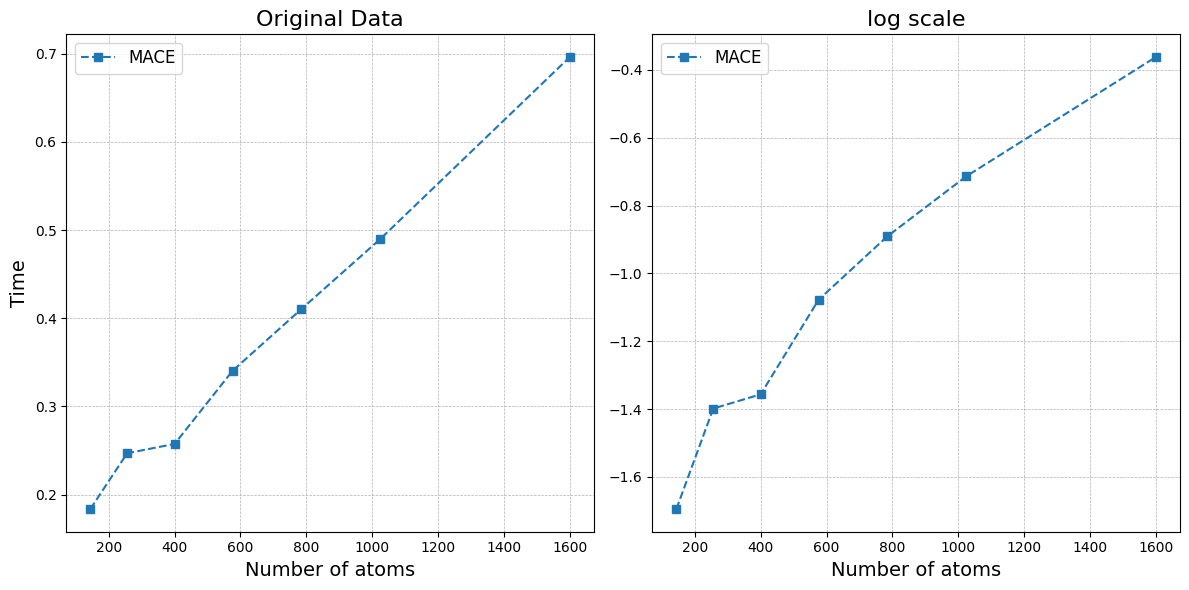

In [9]:
# For visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y2 = mace_elapsed_time_list_by_size
y2_legend = 'MACE'

log_y2 = np.log(y2)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
num_list=np.array(size_up)*np.array(size_up)*4
axes[0].plot(num_list, y2, label=y2_legend, marker='s', linestyle='--', markersize=6)
axes[0].set_title('Original Data', fontsize=16)
axes[0].set_xlabel('Number of atoms', fontsize=14)
axes[0].set_ylabel('Time', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(fontsize=12)

axes[1].plot(num_list, log_y2, label=y2_legend, marker='s', linestyle='--', markersize=6)
axes[1].set_title('log scale', fontsize=16)
axes[1].set_xlabel('Number of atoms', fontsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

Revisiting DFT calculations in handson 1,2,3 and 4

Handson 1: Bulk optimization using GPAW

<ipython-input-23-9f27eb0d6203>:40: DeprecationWarning: Please use atoms.calc = None
  del bulk.calc  # Free memory


 GPAW execution time: 15.05 sec


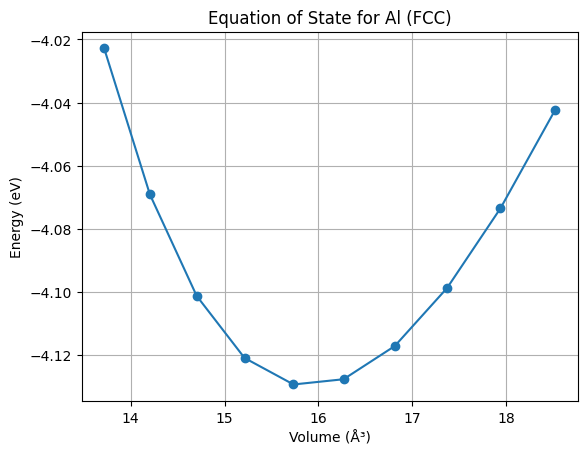

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from gpaw import GPAW, PW

# Set up values for lattice parameter 'a'
a_values = np.linspace(3.8, 4.2, 10)  # Adjust the range and number of points as needed
energies = []
volumes = []
start_time = time.time()

# Loop over each lattice parameter to calculate energy
for a in a_values:
    b = a / 2
    # Define the bulk structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    k = 4
    calc = GPAW(mode=PW(300),       # Plane-wave cutoff
                kpts=(k, k, k),     # k-points grid
                txt=f'Al-fcc-a{a:.2f}.txt')  # Output file with varying name

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Calculate the potential energy
    energy = bulk.get_potential_energy()
    volume = bulk.get_volume()

    # Store the energy and volume
    energies.append(energy)
    volumes.append(volume)

    # Clean up the calculator
    calc.write(f'Al-fcc-a{a:.2f}.gpw')
    del bulk.calc  # Free memory
end_time = time.time()
print(f' GPAW execution time: {end_time - start_time:.2f} sec')
plt.figure()
plt.plot(volumes, energies, marker='o', linestyle='-')
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Equation of State for Al (FCC)')
plt.grid()
plt.show()


Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)
<ipython-in

 MACE execution time: 0.65 sec


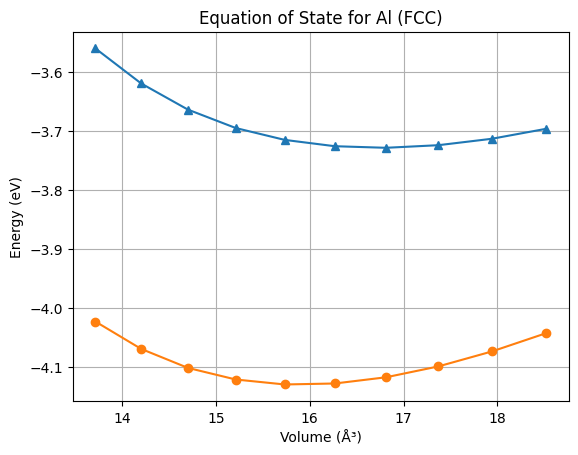

In [25]:
# Set up the MACE calculator
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device='cuda')

# Set up values for lattice parameter 'a'
a_values = np.linspace(3.8, 4.2, 10)  # Adjust the range and number of points as needed
mace_energies = []
mace_volumes = []
start_time = time.time()

for a in a_values:
    b = a / 2
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)
    bulk.calc = mace_calc
    energy = bulk.get_potential_energy()
    volume = bulk.get_volume()
    mace_energies.append(energy)
    mace_volumes.append(volume)
    del bulk.calc  # Free memory
end_time = time.time()
print(f' MACE execution time: {end_time - start_time:.2f} sec')
plt.figure()
plt.plot(mace_volumes, mace_energies, marker='^', linestyle='-')
plt.plot(volumes,energies, marker='o', linestyle='-')

plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Equation of State for Al (FCC)')
plt.grid()
plt.show()




# Following part is for 14th Nov.
__Visualize Potential energy surface of H diffusion on Pt 111__

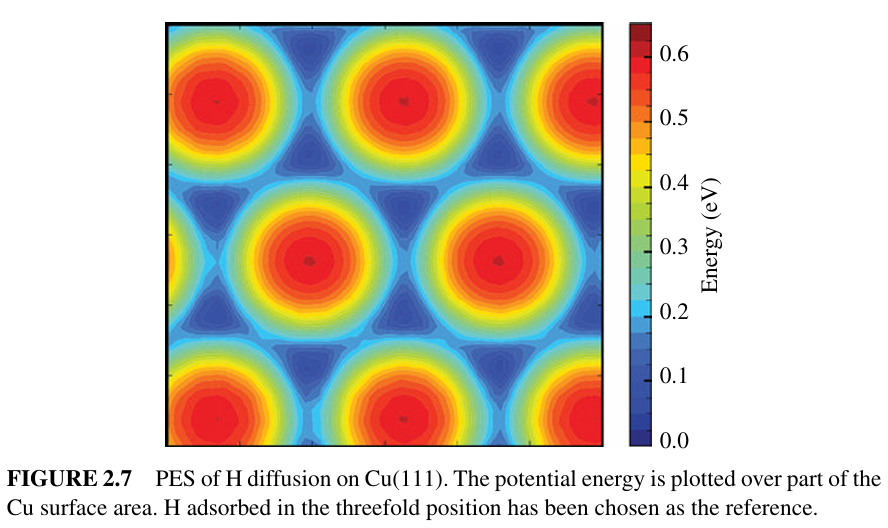

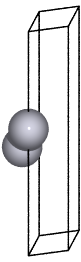

In [10]:
# make Pt 111 slab
from ase.build import fcc111

a0 = 3.93
vac = 7.5
pt111_surf = fcc111(element, (1, 1, 2), a=a0, vacuum=vac)


visual(pt111_surf)

In [11]:
from tqdm import tqdm

pt_z_max = np.max(pt111_surf.positions[:,-1])
pt_lattice_a, pt_lattice_b, _ = pt111_surf.cell.array[0], pt111_surf.cell.array[1], pt111_surf.cell.array[2]

a_num = 40
b_num = 40

a_range = np.linspace(0,1,a_num)
b_range = np.linspace(0,1,b_num)

E_heatmap = np.zeros([a_num,b_num])
mace_calc = mace_mp(model="small", dispersion=False, default_dtype="float32", device='cuda')

total_steps = a_num * b_num
with tqdm(total=total_steps, desc="Total Progress") as pbar:
    for idx_a, a in enumerate(a_range):
        for idx_b, b in enumerate(b_range):
            a_vec = pt_lattice_a * a
            b_vec = pt_lattice_b * b
            c_vec = np.array([0, 0, pt_z_max + 1.39])
            h_positions = a_vec + b_vec + c_vec

            H_atoms = Atoms(symbols=['H'], positions=[h_positions.tolist()])
            pt111_adslab = pt111_surf + H_atoms

            pt111_adslab.calc = mace_calc
            E_heatmap[idx_a, idx_b] = pt111_adslab.get_potential_energy()

            pbar.update(1)
print("Done!")

/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Cached MACE model to /root/.cache/mace/46jrkm3v
Using Materials Project MACE for MACECalculator with /root/.cache/mace/46jrkm3v
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


Total Progress: 100%|██████████| 1600/1600 [01:10<00:00, 22.63it/s]

Done!


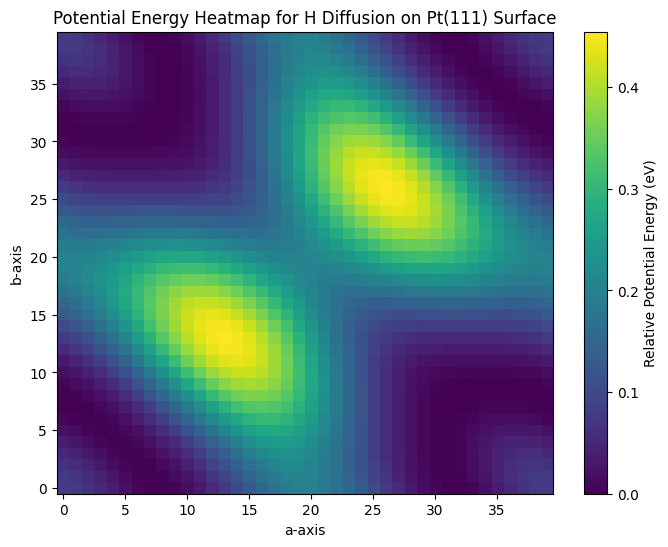

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

E_heatmap = E_heatmap - np.min(E_heatmap)

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(E_heatmap, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(heatmap, label="Relative Potential Energy (eV)")  # Add color bar with label

plt.xlabel("a-axis")
plt.ylabel("b-axis")
plt.title("Potential Energy Heatmap for H Diffusion on Pt(111) Surface")

# Show plot
plt.show()

## __Optimization of the adsorption configuration of OH on FCC Pt__

In [13]:
from ase.optimize import LBFGS
import copy
from ase.build import bulk
from ase.constraints import ExpCellFilter

# for calculation
def energy_cal(atoms,calc,lattice_relax = False,relax_atoms = True,fmax=0.05):
    if not relax_atoms:
        atoms_copied = copy.deepcopy(atoms)
    else:
        atoms_copied = atoms
    atoms_copied.calc = calc
    tags = np.ones(len(atoms_copied))
    atoms_copied.set_tags(tags)
    if lattice_relax:
      ecf = ExpCellFilter(atoms_copied)
      optimizer = LBFGS(ecf)
    else:
      optimizer = LBFGS(atoms_copied)
    optimizer.run(fmax=fmax)
    return atoms_copied.get_potential_energy()

In [14]:
# bulk optimization

name = 'Pt-fcc'
a0 = 3.93  # fcc lattice parameter
element='Pt'

bulk_atoms = bulk(element, 'fcc', a=a0)
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device='cuda')

E_bulk = energy_cal(bulk_atoms,mace_calc,lattice_relax=True)
E_bulk_per_atom = E_bulk / len(bulk_atoms)

print(f"{E_bulk_per_atom = :.2f} eV")

Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)
<ipython-in

       Step     Time          Energy          fmax
LBFGS:    0 23:46:01       -6.020710        0.817162
LBFGS:    1 23:46:01       -6.034800        0.006328
E_bulk_per_atom = -6.03 eV


Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 23:46:02     -561.918679        0.043319
LBFGS:    1 23:46:04     -561.919094        0.040545
LBFGS:    2 23:46:04     -561.922303        0.038982
LBFGS:    3 23:46:05     -561.922643        0.037505
LBFGS:    4 23:46:05     -561.924870        0.003074
Chemical symbols: ['Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt']
Potential Energy: -561.9248698844427 eV
(1, 0, 0) Surface Energy: 0.07951132556301341 eV


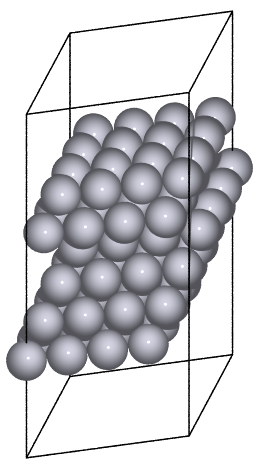

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
       Step     Time          Energy          fmax
LBFGS:    0 23:46:08     -553.475382        0.285095
LBFGS:    1 23:46:08     -553.508726        0.239092
LBFGS:    2 23:46:08     -553.578466        0.059447
LBFGS:    3 23:46:09     -553.579509        0.035775
LBFGS:    4 23:46:09     -553.580528        0.042080
LBFGS:    5 23:46:09     -553.583929        0.047189
LBFGS:    6 23:46:10     -553.586482        0.033485
LBFGS:    7 23:46:10     -553.587743        0.013767
Chemical symbols: ['Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', '

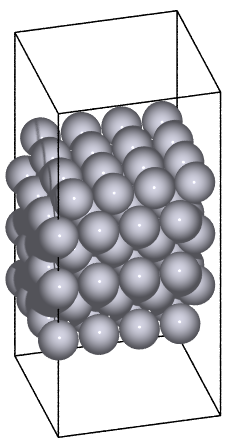

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
       Step     Time          Energy          fmax
LBFGS:    0 23:46:12     -561.918678        0.043319
LBFGS:    1 23:46:13     -561.919094        0.040545
LBFGS:    2 23:46:13     -561.922302        0.038982
LBFGS:    3 23:46:13     -561.922642        0.037505
LBFGS:    4 23:46:14     -561.924869        0.003074
Chemical symbols: ['Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt'

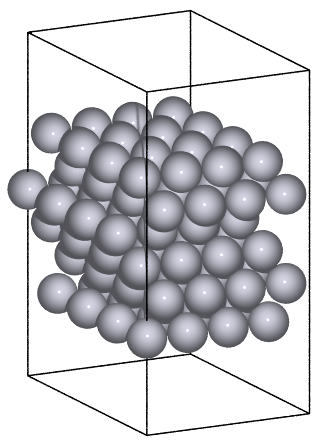

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
       Step     Time          Energy          fmax
LBFGS:    0 23:46:16     -532.710285        1.030372
LBFGS:    1 23:46:16     -532.998765        0.958353
LBFGS:    2 23:46:17     -534.261506        0.561167
LBFGS:    3 23:46:17     -534.459044        0.153827
LBFGS:    4 23:46:17     -534.474069        0.129382
LBFGS:    5 23:46:18     -534.482294        0.111571
LBFGS:    6 23:46:18     -534.506303        0.149035
LBFGS:    7 23:46:18     -534.535304        0.152917
LBFGS:    8 23:46:19     -534.558789        0.107814
LBFGS:    9 23:46:19     -534.566569        0.076522
LBFGS:   10 23:46:19     -534.569867        0.067731
LBFGS:   11 23:46:20     -534.574280        0.066083
LBFGS:   12 23:46:20     -534.580778        0.07

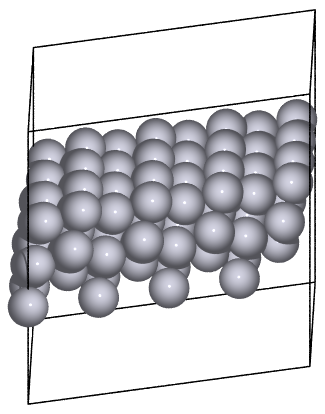

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
       Step     Time          Energy          fmax
LBFGS:    0 23:46:24     -538.553995        1.025261
LBFGS:    1 23:46:25     -538.905970        0.949180
LBFGS:    2 23:46:25     -540.430447        0.315895
LBFGS:    3 23:46:25     -540.524288        0.050289
LBFGS:    4 23:46:26     -540.526858        0.027500
Chemical symbols: ['Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt', 'Pt'

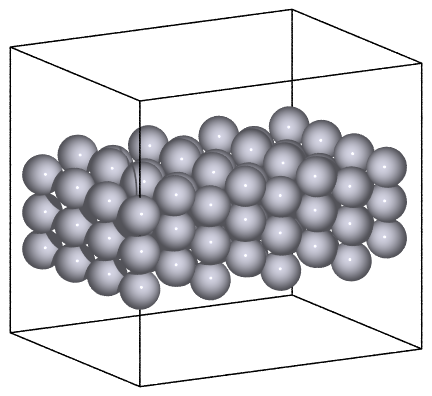

In [15]:
# facet optimization

from ase.build import bulk, surface

size = 4 #  supercell size
vac = 7.5

miller_index_list = [(1,0,0),(1,1,0),(1,1,1),(2,1,0),(2,1,1)]

# surface layer number optimization
N_bulk_layer = 4 #
N_surface_layer = 2
n_atoms_list = []
surface_energy_list = []
time_list = []
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float64", device='cuda')
for miller_index in miller_index_list:
    # Fix all atoms
    N_layer = N_bulk_layer + N_surface_layer
    # generate slab from miller index
    surf = surface(bulk_atoms, miller_index, N_layer)
    surf = surf.repeat((size, size, 1))

    surf.center(vacuum=vac, axis=2)
    z_positions = surf.positions[:, 2]
    sorted_indices = np.argsort(z_positions)
    surf = surf[sorted_indices]

    constraint = FixAtoms(mask=range(size*size*N_bulk_layer))
    print(constraint)
    surf.set_constraint(constraint)

    t_start = time.time()
    optimized_energy = energy_cal(surf,mace_calc,fmax=0.03)
    elapsed_time = time.time() - t_start

    a1 = surf.get_cell()[0]
    a2 = surf.get_cell()[1]
    A = np.linalg.norm(np.cross(a1, a2))
    n_atoms = len(surf)  # number of atoms in the slab
    surface_energy = (optimized_energy - n_atoms * E_bulk_per_atom) / (2 * A)  # factor 2 for two surfaces

    n_atoms_list.append(n_atoms)
    surface_energy_list.append(surface_energy)
    time_list.append(elapsed_time)

    # Print
    print("Chemical symbols:", surf.get_chemical_symbols())
    print(f'Potential Energy: {optimized_energy} eV')
    print(f'{miller_index} Surface Energy: {surface_energy} eV')
    print(f'MACE time taken: {elapsed_time * 1000 :.2f} ms')
    visual(surf)

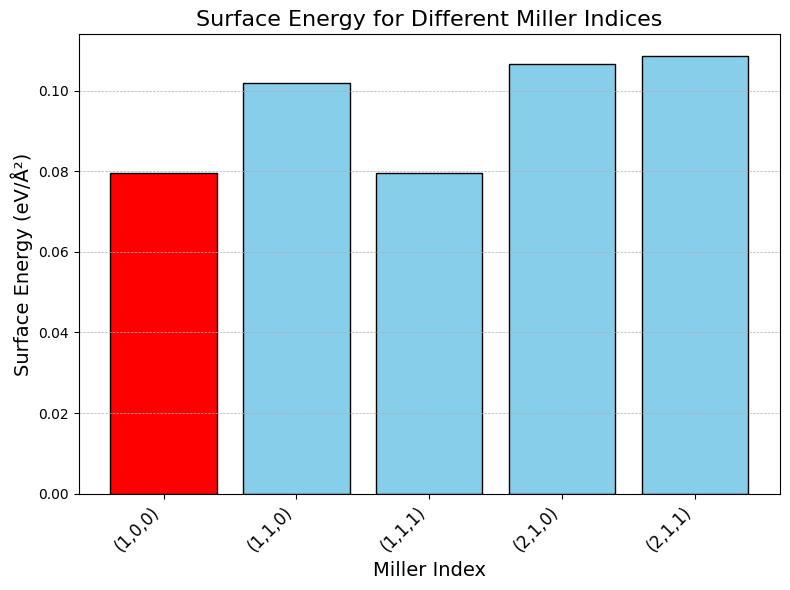

In [16]:
# For visualizing
%matplotlib inline
miller_index_labels = ['({},{},{})'.format(*index) for index in miller_index_list]

min_energy = min(surface_energy_list)
min_energy_index = surface_energy_list.index(min_energy)

colors = ['skyblue' if i != min_energy_index else 'red' for i in range(len(surface_energy_list))]

plt.figure(figsize=(8, 6))
plt.bar(miller_index_labels, surface_energy_list, color=colors, edgecolor='black')

plt.title('Surface Energy for Different Miller Indices', fontsize=16)
plt.xlabel('Miller Index', fontsize=14)
plt.ylabel('Surface Energy (eV/Å²)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [17]:
from ase.build import molecule

oh_atoms = molecule('OH')

O_index = [atom.index for atom in oh_atoms if atom.symbol == 'O'][0]
O_position = oh_atoms.positions[O_index]
oh_atoms.rotate(v='x', a=90, center=O_position)

oh_energy = energy_cal(oh_atoms,mace_calc,relax_atoms=False)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
print(f"OH energy : {oh_energy}")

       Step     Time          Energy          fmax
LBFGS:    0 23:46:28       -7.799503        0.305963
LBFGS:    1 23:46:28       -7.800459        0.084792
LBFGS:    2 23:46:28       -7.800541        0.001398


OH energy : -7.800541013951598


Using Materials Project MACE for MACECalculator with /root/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 23:46:32     -207.459946        0.056971
LBFGS:    1 23:46:32     -207.460587        0.052733
LBFGS:    2 23:46:32     -207.468170        0.054620
LBFGS:    3 23:46:32     -207.468735        0.049244


Total Progress:   0%|          | 0/20 [00:00<?, ?it/s]

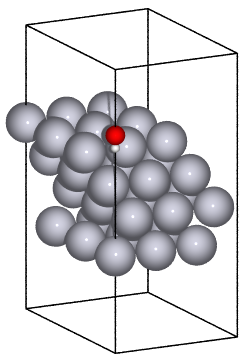

       Step     Time          Energy          fmax
LBFGS:    0 23:46:34     -214.252441        5.621389
LBFGS:    1 23:46:34     -214.757843        2.479801
LBFGS:    2 23:46:34     -214.976425        0.821120
LBFGS:    3 23:46:34     -215.022537        0.686704
LBFGS:    4 23:46:34     -215.057816        0.573097
LBFGS:    5 23:46:34     -215.078552        0.694111
LBFGS:    6 23:46:34     -215.095825        0.570573
LBFGS:    7 23:46:34     -215.109161        0.362288
LBFGS:    8 23:46:34     -215.122040        0.350875
LBFGS:    9 23:46:34     -215.138748        0.394368
LBFGS:   10 23:46:34     -215.155563        0.353703
LBFGS:   11 23:46:34     -215.174088        0.399676
LBFGS:   12 23:46:34     -215.190918        0.278832
LBFGS:   13 23:46:34     -215.202179        0.128448
LBFGS:   14 23:46:35     -215.209229        0.120902
LBFGS:   15 23:46:35     -215.214539        0.155639
LBFGS:   16 23:46:35     -215.219177        0.128520
LBFGS:   17 23:46:35     -215.221344        0.07

Total Progress:   5%|▌         | 1/20 [00:02<00:53,  2.83s/it]

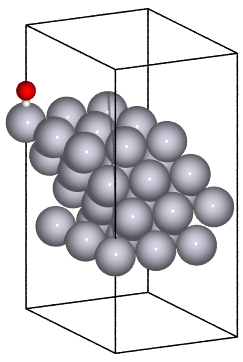

       Step     Time          Energy          fmax
LBFGS:    0 23:46:37     -214.252441        5.621388
LBFGS:    1 23:46:37     -214.757843        2.479802
LBFGS:    2 23:46:37     -214.976425        0.821120
LBFGS:    3 23:46:37     -215.022522        0.686705
LBFGS:    4 23:46:37     -215.057816        0.573097
LBFGS:    5 23:46:37     -215.078552        0.694109
LBFGS:    6 23:46:37     -215.095825        0.570578
LBFGS:    7 23:46:37     -215.109161        0.362290
LBFGS:    8 23:46:38     -215.122040        0.350878
LBFGS:    9 23:46:38     -215.138748        0.394368
LBFGS:   10 23:46:38     -215.155563        0.353711
LBFGS:   11 23:46:38     -215.174088        0.399670
LBFGS:   12 23:46:38     -215.190918        0.278822
LBFGS:   13 23:46:38     -215.202179        0.128446
LBFGS:   14 23:46:38     -215.209229        0.120905
LBFGS:   15 23:46:38     -215.214539        0.155632
LBFGS:   16 23:46:38     -215.219177        0.128506
LBFGS:   17 23:46:38     -215.221344        0.07

Total Progress:  10%|█         | 2/20 [00:06<00:55,  3.09s/it]

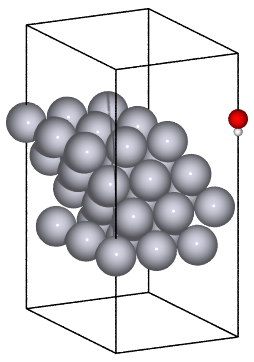

       Step     Time          Energy          fmax
LBFGS:    0 23:46:40     -214.252441        5.621389
LBFGS:    1 23:46:40     -214.757843        2.479802
LBFGS:    2 23:46:40     -214.976425        0.821119
LBFGS:    3 23:46:40     -215.022537        0.686704
LBFGS:    4 23:46:40     -215.057816        0.573099
LBFGS:    5 23:46:40     -215.078552        0.694111
LBFGS:    6 23:46:40     -215.095825        0.570576
LBFGS:    7 23:46:40     -215.109161        0.362285
LBFGS:    8 23:46:40     -215.122040        0.350871
LBFGS:    9 23:46:40     -215.138748        0.394369
LBFGS:   10 23:46:40     -215.155563        0.353711
LBFGS:   11 23:46:40     -215.174088        0.399674
LBFGS:   12 23:46:40     -215.190918        0.278816
LBFGS:   13 23:46:40     -215.202179        0.128446
LBFGS:   14 23:46:40     -215.209229        0.120900
LBFGS:   15 23:46:41     -215.214539        0.155640
LBFGS:   16 23:46:41     -215.219177        0.128516
LBFGS:   17 23:46:41     -215.221344        0.07

Total Progress:  15%|█▌        | 3/20 [00:08<00:47,  2.80s/it]

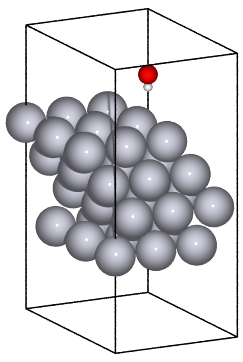

       Step     Time          Energy          fmax
LBFGS:    0 23:46:42     -214.252441        5.621390
LBFGS:    1 23:46:42     -214.757843        2.479801
LBFGS:    2 23:46:42     -214.976425        0.821120
LBFGS:    3 23:46:42     -215.022537        0.686704
LBFGS:    4 23:46:42     -215.057816        0.573097
LBFGS:    5 23:46:42     -215.078537        0.694109
LBFGS:    6 23:46:42     -215.095825        0.570572
LBFGS:    7 23:46:43     -215.109161        0.362289
LBFGS:    8 23:46:43     -215.122040        0.350872
LBFGS:    9 23:46:43     -215.138748        0.394372
LBFGS:   10 23:46:43     -215.155563        0.353712
LBFGS:   11 23:46:43     -215.174088        0.399669
LBFGS:   12 23:46:43     -215.190918        0.278830
LBFGS:   13 23:46:43     -215.202179        0.128446
LBFGS:   14 23:46:43     -215.209229        0.120907
LBFGS:   15 23:46:43     -215.214539        0.155640
LBFGS:   16 23:46:43     -215.219177        0.128511
LBFGS:   17 23:46:43     -215.221344        0.07

Total Progress:  20%|██        | 4/20 [00:10<00:42,  2.66s/it]

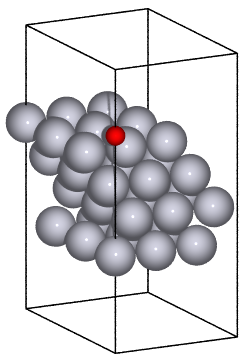

       Step     Time          Energy          fmax
LBFGS:    0 23:46:45     -215.637283        1.874069
LBFGS:    1 23:46:45     -215.708038        1.723667
LBFGS:    2 23:46:45     -216.057983        3.066361
LBFGS:    3 23:46:45     -216.201065        3.448799
LBFGS:    4 23:46:45     -216.496017        2.378011
LBFGS:    5 23:46:45     -216.628632        1.941583
LBFGS:    6 23:46:45     -216.660812        0.925579
LBFGS:    7 23:46:45     -216.699951        0.824600
LBFGS:    8 23:46:45     -216.726089        0.551919
LBFGS:    9 23:46:45     -216.744202        0.368703
LBFGS:   10 23:46:45     -216.749146        0.302598
LBFGS:   11 23:46:45     -216.757339        0.460540
LBFGS:   12 23:46:45     -216.772049        0.701251
LBFGS:   13 23:46:45     -216.790100        0.746850
LBFGS:   14 23:46:45     -216.804138        0.457882
LBFGS:   15 23:46:45     -216.811401        0.217251
LBFGS:   16 23:46:46     -216.814713        0.243272
LBFGS:   17 23:46:46     -216.820908        0.29

Total Progress:  25%|██▌       | 5/20 [00:13<00:41,  2.74s/it]

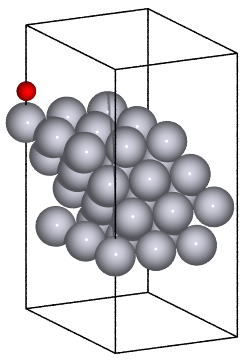

       Step     Time          Energy          fmax
LBFGS:    0 23:46:48     -215.637283        1.874069
LBFGS:    1 23:46:48     -215.708038        1.723667
LBFGS:    2 23:46:48     -216.057983        3.066364
LBFGS:    3 23:46:48     -216.201080        3.448794
LBFGS:    4 23:46:48     -216.496017        2.378004
LBFGS:    5 23:46:48     -216.628632        1.941593
LBFGS:    6 23:46:48     -216.660812        0.925589
LBFGS:    7 23:46:48     -216.699951        0.824600
LBFGS:    8 23:46:48     -216.726089        0.551911
LBFGS:    9 23:46:48     -216.744217        0.368672
LBFGS:   10 23:46:48     -216.749146        0.302613
LBFGS:   11 23:46:48     -216.757339        0.460533
LBFGS:   12 23:46:48     -216.772049        0.701257
LBFGS:   13 23:46:48     -216.790100        0.746794
LBFGS:   14 23:46:49     -216.804138        0.457830
LBFGS:   15 23:46:49     -216.811401        0.217253
LBFGS:   16 23:46:49     -216.814713        0.243294
LBFGS:   17 23:46:49     -216.820892        0.29

Total Progress:  30%|███       | 6/20 [00:17<00:41,  2.96s/it]

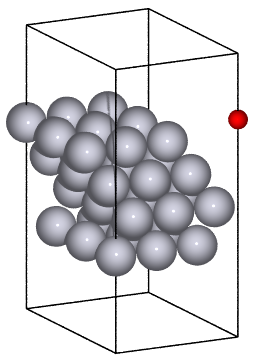

       Step     Time          Energy          fmax
LBFGS:    0 23:46:52     -215.637283        1.874069
LBFGS:    1 23:46:52     -215.708038        1.723667
LBFGS:    2 23:46:52     -216.057983        3.066361
LBFGS:    3 23:46:52     -216.201080        3.448791
LBFGS:    4 23:46:52     -216.496017        2.378009
LBFGS:    5 23:46:52     -216.628632        1.941594
LBFGS:    6 23:46:52     -216.660812        0.925642
LBFGS:    7 23:46:52     -216.699951        0.824617
LBFGS:    8 23:46:52     -216.726089        0.551931
LBFGS:    9 23:46:52     -216.744217        0.368698
LBFGS:   10 23:46:52     -216.749146        0.302608
LBFGS:   11 23:46:52     -216.757339        0.460573
LBFGS:   12 23:46:52     -216.772049        0.701214
LBFGS:   13 23:46:52     -216.790100        0.746869
LBFGS:   14 23:46:52     -216.804138        0.457909
LBFGS:   15 23:46:52     -216.811401        0.217260
LBFGS:   16 23:46:53     -216.814713        0.243258
LBFGS:   17 23:46:53     -216.820908        0.29

Total Progress:  35%|███▌      | 7/20 [00:20<00:41,  3.16s/it]

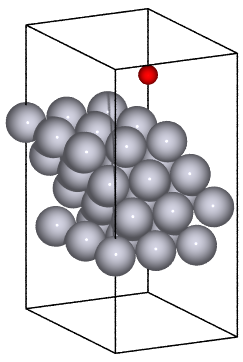

       Step     Time          Energy          fmax
LBFGS:    0 23:46:54     -215.637283        1.874069
LBFGS:    1 23:46:55     -215.708038        1.723667
LBFGS:    2 23:46:55     -216.057983        3.066364
LBFGS:    3 23:46:55     -216.201080        3.448783
LBFGS:    4 23:46:55     -216.496017        2.378004
LBFGS:    5 23:46:55     -216.628632        1.941593
LBFGS:    6 23:46:55     -216.660812        0.925591
LBFGS:    7 23:46:55     -216.699951        0.824599
LBFGS:    8 23:46:55     -216.726089        0.551921
LBFGS:    9 23:46:55     -216.744217        0.368686
LBFGS:   10 23:46:55     -216.749146        0.302611
LBFGS:   11 23:46:55     -216.757339        0.460581
LBFGS:   12 23:46:55     -216.772049        0.701222
LBFGS:   13 23:46:55     -216.790100        0.746832
LBFGS:   14 23:46:55     -216.804138        0.457840
LBFGS:   15 23:46:55     -216.811401        0.217260
LBFGS:   16 23:46:55     -216.814713        0.243271
LBFGS:   17 23:46:55     -216.820892        0.29

Total Progress:  40%|████      | 8/20 [00:23<00:37,  3.11s/it]

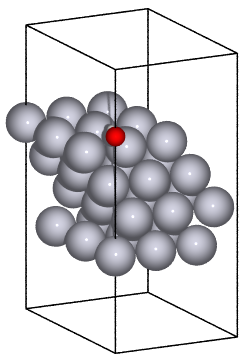

       Step     Time          Energy          fmax
LBFGS:    0 23:46:57     -216.343185        1.864783
LBFGS:    1 23:46:58     -216.433807        1.799205
LBFGS:    2 23:46:58     -216.788605        1.366783
LBFGS:    3 23:46:58     -216.798477        0.675360
LBFGS:    4 23:46:58     -216.815582        0.291450
LBFGS:    5 23:46:58     -216.818253        0.249231
LBFGS:    6 23:46:58     -216.820572        0.273883
LBFGS:    7 23:46:58     -216.828903        0.197187
LBFGS:    8 23:46:58     -216.830200        0.128977
LBFGS:    9 23:46:58     -216.831406        0.147006
LBFGS:   10 23:46:58     -216.833115        0.154589
LBFGS:   11 23:46:58     -216.835098        0.138166
LBFGS:   12 23:46:58     -216.836578        0.100571
LBFGS:   13 23:46:58     -216.837509        0.078549
LBFGS:   14 23:46:58     -216.838196        0.081578
LBFGS:   15 23:46:58     -216.839111        0.118712
LBFGS:   16 23:46:58     -216.840088        0.110325
LBFGS:   17 23:46:58     -216.840622        0.05

Total Progress:  45%|████▌     | 9/20 [00:26<00:32,  2.92s/it]

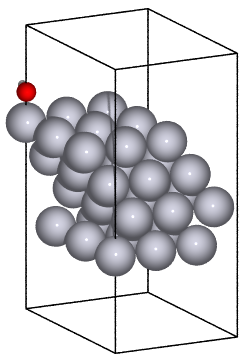

       Step     Time          Energy          fmax
LBFGS:    0 23:47:00     -216.343185        1.864784
LBFGS:    1 23:47:00     -216.433823        1.799204
LBFGS:    2 23:47:00     -216.788605        1.366803
LBFGS:    3 23:47:00     -216.798477        0.675360
LBFGS:    4 23:47:00     -216.815567        0.291466
LBFGS:    5 23:47:00     -216.818253        0.249240
LBFGS:    6 23:47:00     -216.820572        0.273871
LBFGS:    7 23:47:00     -216.828903        0.197103
LBFGS:    8 23:47:00     -216.830200        0.128976
LBFGS:    9 23:47:00     -216.831406        0.147025
LBFGS:   10 23:47:01     -216.833115        0.154595
LBFGS:   11 23:47:01     -216.835098        0.138159
LBFGS:   12 23:47:01     -216.836578        0.100558
LBFGS:   13 23:47:01     -216.837509        0.078539
LBFGS:   14 23:47:01     -216.838196        0.081584
LBFGS:   15 23:47:01     -216.839111        0.118771
LBFGS:   16 23:47:01     -216.840088        0.110262
LBFGS:   17 23:47:01     -216.840622        0.05

Total Progress:  50%|█████     | 10/20 [00:28<00:28,  2.80s/it]

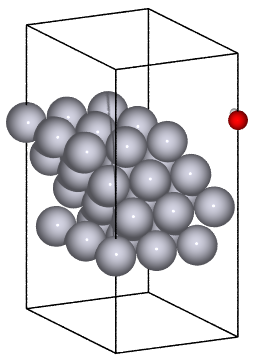

       Step     Time          Energy          fmax
LBFGS:    0 23:47:03     -216.343185        1.864784
LBFGS:    1 23:47:03     -216.433807        1.799205
LBFGS:    2 23:47:03     -216.788589        1.366787
LBFGS:    3 23:47:03     -216.798477        0.675360
LBFGS:    4 23:47:03     -216.815567        0.291450
LBFGS:    5 23:47:03     -216.818253        0.249231
LBFGS:    6 23:47:03     -216.820572        0.273882
LBFGS:    7 23:47:03     -216.828903        0.197182
LBFGS:    8 23:47:03     -216.830200        0.128978
LBFGS:    9 23:47:03     -216.831406        0.147001
LBFGS:   10 23:47:03     -216.833115        0.154590
LBFGS:   11 23:47:03     -216.835098        0.138163
LBFGS:   12 23:47:04     -216.836578        0.100570
LBFGS:   13 23:47:04     -216.837509        0.078542
LBFGS:   14 23:47:04     -216.838196        0.081577
LBFGS:   15 23:47:04     -216.839111        0.118753
LBFGS:   16 23:47:04     -216.840088        0.110300
LBFGS:   17 23:47:04     -216.840622        0.05

Total Progress:  55%|█████▌    | 11/20 [00:31<00:25,  2.89s/it]

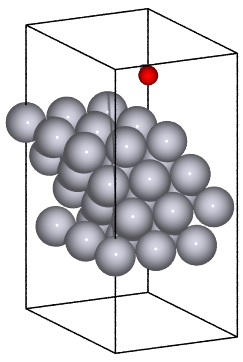

       Step     Time          Energy          fmax
LBFGS:    0 23:47:06     -216.343201        1.864783
LBFGS:    1 23:47:06     -216.433823        1.799204
LBFGS:    2 23:47:06     -216.788605        1.366804
LBFGS:    3 23:47:06     -216.798477        0.675360
LBFGS:    4 23:47:06     -216.815582        0.291466
LBFGS:    5 23:47:06     -216.818253        0.249239
LBFGS:    6 23:47:06     -216.820572        0.273872
LBFGS:    7 23:47:06     -216.828903        0.197139
LBFGS:    8 23:47:07     -216.830200        0.128990
LBFGS:    9 23:47:07     -216.831406        0.147030
LBFGS:   10 23:47:07     -216.833115        0.154559
LBFGS:   11 23:47:07     -216.835098        0.138187
LBFGS:   12 23:47:07     -216.836578        0.100561
LBFGS:   13 23:47:07     -216.837509        0.078541
LBFGS:   14 23:47:07     -216.838196        0.081589
LBFGS:   15 23:47:07     -216.839111        0.118727
LBFGS:   16 23:47:07     -216.840088        0.110240
LBFGS:   17 23:47:07     -216.840622        0.05

Total Progress:  60%|██████    | 12/20 [00:35<00:23,  2.94s/it]

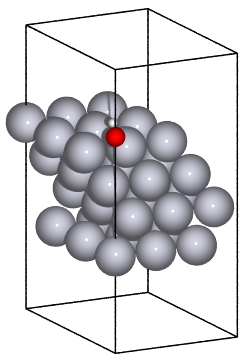

       Step     Time          Energy          fmax
LBFGS:    0 23:47:09     -216.140884        1.601216
LBFGS:    1 23:47:09     -216.192993        1.558800
LBFGS:    2 23:47:09     -216.565445        1.391465
LBFGS:    3 23:47:09     -216.584335        3.137904
LBFGS:    4 23:47:09     -216.691315        0.885938
LBFGS:    5 23:47:09     -216.726151        0.719828
LBFGS:    6 23:47:09     -216.800400        0.675109
LBFGS:    7 23:47:09     -216.816772        0.381493
LBFGS:    8 23:47:09     -216.825226        0.341353
LBFGS:    9 23:47:09     -216.829956        0.294463
LBFGS:   10 23:47:09     -216.834473        0.232852
LBFGS:   11 23:47:09     -216.837418        0.114399
LBFGS:   12 23:47:09     -216.838821        0.084543
LBFGS:   13 23:47:09     -216.839447        0.085473
LBFGS:   14 23:47:10     -216.840500        0.117073
LBFGS:   15 23:47:10     -216.841400        0.095179
LBFGS:   16 23:47:10     -216.841980        0.051697


Total Progress:  65%|██████▌   | 13/20 [00:37<00:19,  2.82s/it]

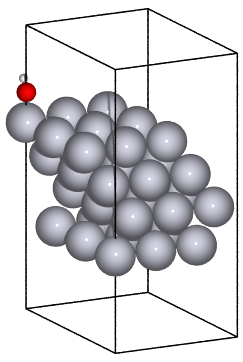

       Step     Time          Energy          fmax
LBFGS:    0 23:47:11     -216.140884        1.601217
LBFGS:    1 23:47:11     -216.192993        1.558800
LBFGS:    2 23:47:11     -216.565445        1.391465
LBFGS:    3 23:47:11     -216.584335        3.137899
LBFGS:    4 23:47:11     -216.691315        0.885946
LBFGS:    5 23:47:11     -216.726151        0.719858
LBFGS:    6 23:47:12     -216.800400        0.674951
LBFGS:    7 23:47:12     -216.816772        0.381492
LBFGS:    8 23:47:12     -216.825226        0.341354
LBFGS:    9 23:47:12     -216.829956        0.294456
LBFGS:   10 23:47:12     -216.834473        0.232836
LBFGS:   11 23:47:12     -216.837418        0.114344
LBFGS:   12 23:47:12     -216.838821        0.084540
LBFGS:   13 23:47:12     -216.839447        0.085488
LBFGS:   14 23:47:12     -216.840500        0.117066
LBFGS:   15 23:47:12     -216.841400        0.095180
LBFGS:   16 23:47:12     -216.841980        0.051697


Total Progress:  70%|███████   | 14/20 [00:40<00:16,  2.74s/it]

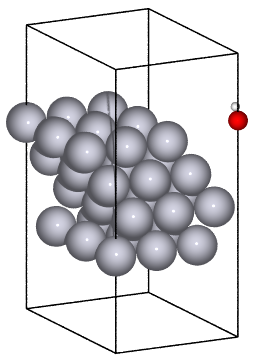

       Step     Time          Energy          fmax
LBFGS:    0 23:47:14     -216.140884        1.601217
LBFGS:    1 23:47:14     -216.192993        1.558800
LBFGS:    2 23:47:14     -216.565445        1.391463
LBFGS:    3 23:47:14     -216.584335        3.137902
LBFGS:    4 23:47:14     -216.691315        0.885938
LBFGS:    5 23:47:14     -216.726151        0.719827
LBFGS:    6 23:47:14     -216.800400        0.675170
LBFGS:    7 23:47:14     -216.816772        0.381493
LBFGS:    8 23:47:14     -216.825226        0.341362
LBFGS:    9 23:47:14     -216.829956        0.294461
LBFGS:   10 23:47:14     -216.834473        0.232864
LBFGS:   11 23:47:14     -216.837418        0.114390
LBFGS:   12 23:47:15     -216.838821        0.084554
LBFGS:   13 23:47:15     -216.839447        0.085485
LBFGS:   14 23:47:15     -216.840500        0.117051
LBFGS:   15 23:47:15     -216.841400        0.095202
LBFGS:   16 23:47:15     -216.841980        0.051701


Total Progress:  75%|███████▌  | 15/20 [00:42<00:13,  2.69s/it]

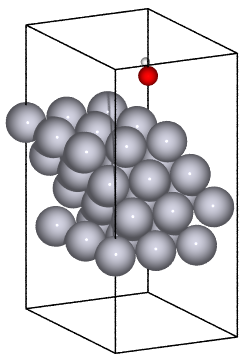

       Step     Time          Energy          fmax
LBFGS:    0 23:47:16     -216.140884        1.601217
LBFGS:    1 23:47:17     -216.192993        1.558800
LBFGS:    2 23:47:17     -216.565445        1.391464
LBFGS:    3 23:47:17     -216.584335        3.137900
LBFGS:    4 23:47:17     -216.691315        0.885946
LBFGS:    5 23:47:17     -216.726151        0.719857
LBFGS:    6 23:47:17     -216.800400        0.674946
LBFGS:    7 23:47:17     -216.816772        0.381504
LBFGS:    8 23:47:17     -216.825241        0.341353
LBFGS:    9 23:47:17     -216.829956        0.294463
LBFGS:   10 23:47:17     -216.834473        0.232818
LBFGS:   11 23:47:17     -216.837418        0.114375
LBFGS:   12 23:47:17     -216.838821        0.084571
LBFGS:   13 23:47:18     -216.839447        0.085477
LBFGS:   14 23:47:18     -216.840500        0.117077
LBFGS:   15 23:47:18     -216.841400        0.095183
LBFGS:   16 23:47:18     -216.841980        0.051699


Total Progress:  80%|████████  | 16/20 [00:45<00:11,  2.81s/it]

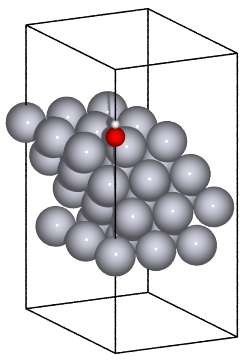

       Step     Time          Energy          fmax
LBFGS:    0 23:47:20     -215.790726        0.934429
LBFGS:    1 23:47:20     -215.807007        0.897926
LBFGS:    2 23:47:20     -215.927200        0.525806
LBFGS:    3 23:47:20     -215.934692        0.217441
LBFGS:    4 23:47:20     -215.941574        0.358008
LBFGS:    5 23:47:20     -215.952408        0.264995
LBFGS:    6 23:47:20     -215.953400        0.157861
LBFGS:    7 23:47:20     -215.955338        0.302193
LBFGS:    8 23:47:20     -215.958206        0.451565
LBFGS:    9 23:47:21     -215.961533        0.438967
LBFGS:   10 23:47:21     -215.963730        0.247440
LBFGS:   11 23:47:21     -215.965149        0.078135
LBFGS:   12 23:47:21     -215.966293        0.183987
LBFGS:   13 23:47:21     -215.967621        0.213907
LBFGS:   14 23:47:21     -215.968552        0.133338
LBFGS:   15 23:47:21     -215.968933        0.037576


Total Progress:  85%|████████▌ | 17/20 [00:48<00:08,  2.89s/it]

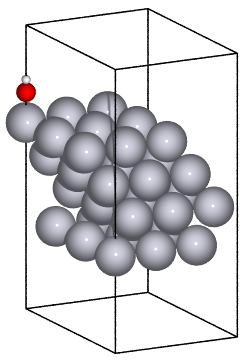

       Step     Time          Energy          fmax
LBFGS:    0 23:47:23     -215.790726        0.934430
LBFGS:    1 23:47:23     -215.807007        0.897926
LBFGS:    2 23:47:23     -215.927200        0.525807
LBFGS:    3 23:47:23     -215.934692        0.217441
LBFGS:    4 23:47:23     -215.941574        0.357901
LBFGS:    5 23:47:23     -215.952408        0.265205
LBFGS:    6 23:47:23     -215.953400        0.157862
LBFGS:    7 23:47:23     -215.955338        0.302143
LBFGS:    8 23:47:23     -215.958206        0.451522
LBFGS:    9 23:47:23     -215.961533        0.439121
LBFGS:   10 23:47:23     -215.963715        0.247788
LBFGS:   11 23:47:23     -215.965164        0.078027
LBFGS:   12 23:47:23     -215.966278        0.183873
LBFGS:   13 23:47:23     -215.967621        0.214000
LBFGS:   14 23:47:23     -215.968552        0.133536
LBFGS:   15 23:47:24     -215.968948        0.037578


Total Progress:  90%|█████████ | 18/20 [00:51<00:05,  2.80s/it]

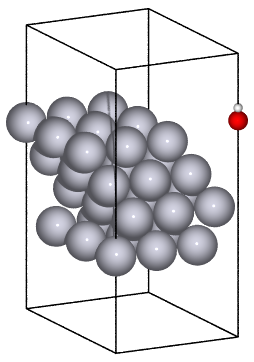

       Step     Time          Energy          fmax
LBFGS:    0 23:47:25     -215.790726        0.934429
LBFGS:    1 23:47:25     -215.807007        0.897926
LBFGS:    2 23:47:25     -215.927200        0.525807
LBFGS:    3 23:47:25     -215.934692        0.217441
LBFGS:    4 23:47:25     -215.941574        0.358008
LBFGS:    5 23:47:25     -215.952408        0.264995
LBFGS:    6 23:47:25     -215.953400        0.157861
LBFGS:    7 23:47:26     -215.955338        0.302213
LBFGS:    8 23:47:26     -215.958206        0.451561
LBFGS:    9 23:47:26     -215.961533        0.438956
LBFGS:   10 23:47:26     -215.963715        0.247450
LBFGS:   11 23:47:26     -215.965164        0.078137
LBFGS:   12 23:47:26     -215.966293        0.184092
LBFGS:   13 23:47:26     -215.967621        0.213700
LBFGS:   14 23:47:26     -215.968552        0.133330
LBFGS:   15 23:47:26     -215.968948        0.037581


Total Progress:  95%|█████████▌| 19/20 [00:54<00:02,  2.86s/it]


KeyboardInterrupt: 

In [18]:
# site enumeration
from tqdm import tqdm
from ase.build import bulk, surface
from ase.build import add_adsorbate

size = 3 #  supercell size
vac = 7.5
miller_index = (1,1,1)

# surface layer number optimization
N_bulk_layer = 2 #
N_surface_layer = 2
n_atoms_list = []
surface_energy_list = []
time_list = []
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device='cuda')

N_layer = N_bulk_layer + N_surface_layer

surf = surface(bulk_atoms, miller_index, N_layer)
surf = surf.repeat((size, size, 1))

surf.center(vacuum=vac, axis=2)
z_positions = surf.positions[:, 2]
sorted_indices = np.argsort(z_positions)
surf = surf[sorted_indices]

constraint = FixAtoms(mask=range(size*size*N_bulk_layer))
print(constraint)
surf.set_constraint(constraint)

surf_energy = energy_cal(surf,mace_calc)

########### adsorption configuration enumeration ############
surf_z_max = np.max(surf.positions[:,-1])
lattice_a, lattice_b, _ = surf.cell.array[0], surf.cell.array[1], surf.cell.array[2]

a_num = 2
b_num = 2
rot_num = 5
a_range = np.linspace(0,1,a_num)
b_range = np.linspace(0,1,b_num)
rot_range = np.linspace(0,180,rot_num)

total_num = a_num * b_num * rot_num
#################
surf_with_adsorbate_list = []
adsorption_energy_list = []
with tqdm(total=total_num, desc="Total Progress") as pbar:
    for rot in rot_range:
        oh_atoms = molecule('OH')
        O_index = [atom.index for atom in oh_atoms if atom.symbol == 'O'][0]
        O_position = oh_atoms.positions[O_index]
        oh_atoms.rotate(v='x', a=rot, center=O_position)
        for a in a_range:
            for b in b_range:
                a_vec = lattice_a * a
                b_vec = lattice_b * b
                c_vec = np.array([0, 0, surf_z_max + 1.39 + 1.0])
                oh_atoms.positions = (oh_atoms.positions - oh_atoms.get_center_of_mass()) + a_vec + b_vec + c_vec

                surf_with_adsorbate = copy.deepcopy(surf) + oh_atoms
                visual(surf_with_adsorbate)
                optimized_energy = energy_cal(surf_with_adsorbate,mace_calc,fmax=0.07)
                surf_with_adsorbate_list.append(surf_with_adsorbate)
                adsorption_energy = optimized_energy - (oh_energy + surf_energy)
                adsorption_energy_list.append(adsorption_energy)

                pbar.update(1)

In [ ]:
adsorption_energy_list

In [ ]:
min_ads_idx = np.argmin(np.array(adsorption_energy_list))

print(f"Optimized adsorption energy : {adsorption_energy_list[min_ads_idx]} eV")
visual(surf_with_adsorbate_list[min_ads_idx])